<a href="https://colab.research.google.com/github/NovrianPratama/MachineLearning/blob/dicoding/Dicoding_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering Costumer Mall

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer

from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

In [2]:
mall_df = pd.read_csv('/content/Mall_Customers.csv')
mall_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
mall_df.shape

(200, 5)

In [3]:
mall_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Informasi:
- CustomerID: Ini berisi ID unik untuk setiap pelanggan, bertipe data int64.
- Gender: Ini menunjukkan jenis kelamin pelanggan, bertipe data object (kategori).
- Age: Ini menampilkan usia pelanggan dalam tahun, bertipe data int64.
- Annual Income (k$): Ini berisi pendapatan tahunan pelanggan dalam ribuan dolar, bertipe data int64.
- Spending Score (1-100): Ini menunjukkan skor pengeluaran pelanggan, mulai dari 1 hingga 100, bertipe data int64.

In [6]:
# Melihat distribusi data dengan statistik
mall_df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Informasi:

1. CustomerID
  *   Ini terdiri dari 200 data unik dengan nilai rata-rata 100.5.
  *   ID pelanggan bervariasi dari 1 hingga 200.

2. Age (Usia)

  - Usia pelanggan berkisar antara 18 hingga 70 tahun dengan rata-rata 38.85 tahun.
  - Sebagian besar pelanggan berada pada rentang usia 28.75 hingga 49 tahun (kuartil ke-1 hingga ke-3).

3. Annual Income (k$) (Pendapatan Tahunan)
  - Pendapatan tahunan pelanggan bervariasi antara 15 hingga 137 ribu dolar dengan rata-rata 60.56 ribu dolar.
  - Sebagian besar pelanggan memiliki pendapatan tahunan antara 41.5 hingga 78 ribu dolar.

4. Spending Score (1–100) (Skor Pengeluaran)
  - Skor pengeluaran pelanggan bervariasi dari 1 hingga 99 dengan rata-rata skor pengeluaran sebesar 50.2.
  - Sebagian besar pelanggan memiliki skor pengeluaran antara 34.75 hingga 73.

# Exploratory Data Analysis

## Distribusi Gender

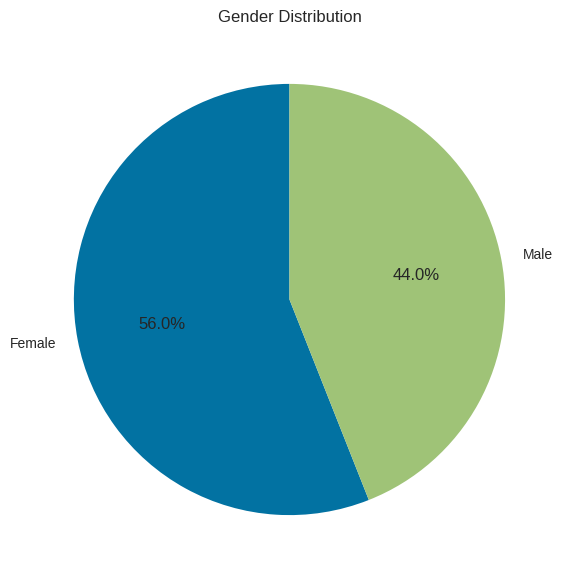

In [11]:
plt.figure(figsize=(7,7))
plt.pie(mall_df['Gender'].value_counts(),
        labels=['Female', 'Male'], autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.show()

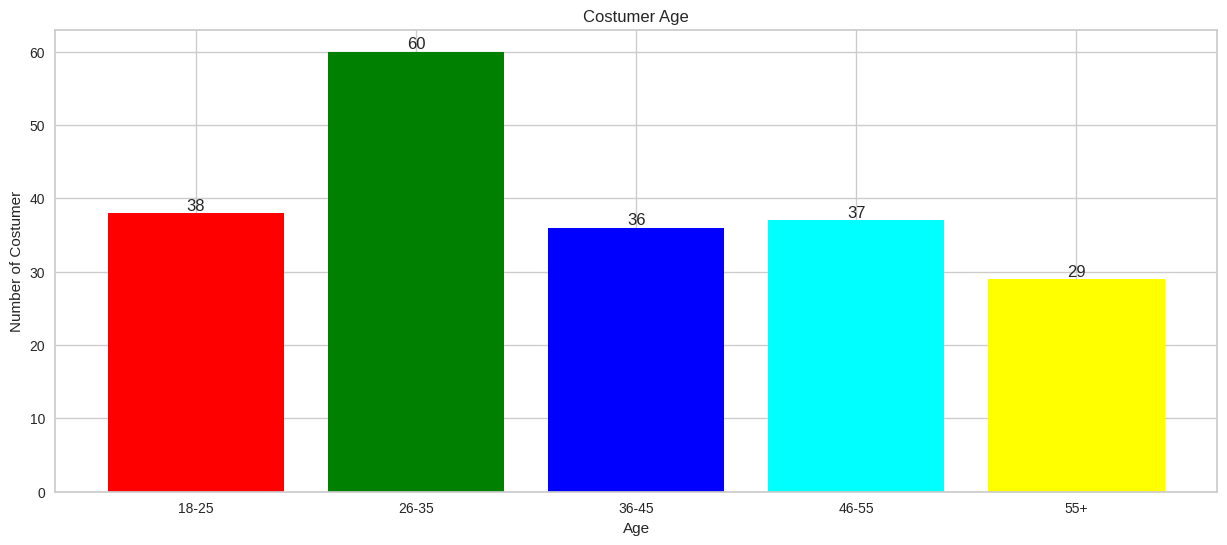

In [18]:
# Mengelompokkan usia pelanggan ke dalam kategori dan menghitung jumlah
# pelanggan di setiap kategori
Age18_25 = mall_df.Age[(mall_df.Age >= 18) & (mall_df.Age <= 25)]
Age26_35 = mall_df.Age[(mall_df.Age >= 26) & (mall_df.Age <= 35)]
Age36_45 = mall_df.Age[(mall_df.Age >= 36) & (mall_df.Age <= 45)]
Age46_55 = mall_df.Age[(mall_df.Age >= 46) & (mall_df.Age <= 55)]
Age55_above = mall_df.Age[mall_df.Age >= 56]

# Menyusun data untuk plotting
x = ["18-25", "26-35", "36-45", "46-55", "55+"]
y = [len(Age18_25.values), len(Age26_35.values),
     len(Age36_45.values), len(Age46_55.values), len(Age55_above.values)]

# membuat bar chart untuk distribusi usia pelanggan
plt.figure(figsize=(15,6))
plt.bar(x, y, color=['red', 'green', 'blue', 'cyan', 'yellow'])
plt.title('Costumer Age')
plt.xlabel('Age')
plt.ylabel('Number of Costumer')

# Menambahkan label jumlah pelanggan diatas setiap bar
for i in range(len(x)):
  plt.text(i, y[i], y[i], ha='center', va='bottom')

plt.show()

Informasi Visualisasi Age:
- 18–25 tahun: ada 38 pelanggan dalam rentang usia ini.
- 26–35 tahun: kategori ini memiliki jumlah pelanggan terbanyak, yaitu 60.
- 36–45 tahun: ada 36 pelanggan dalam rentang usia ini.
- 46–55 tahun: ada 37 pelanggan yang termasuk dalam kategori ini.
- 55 tahun ke atas: rentang usia ini memiliki 29 pelanggan.

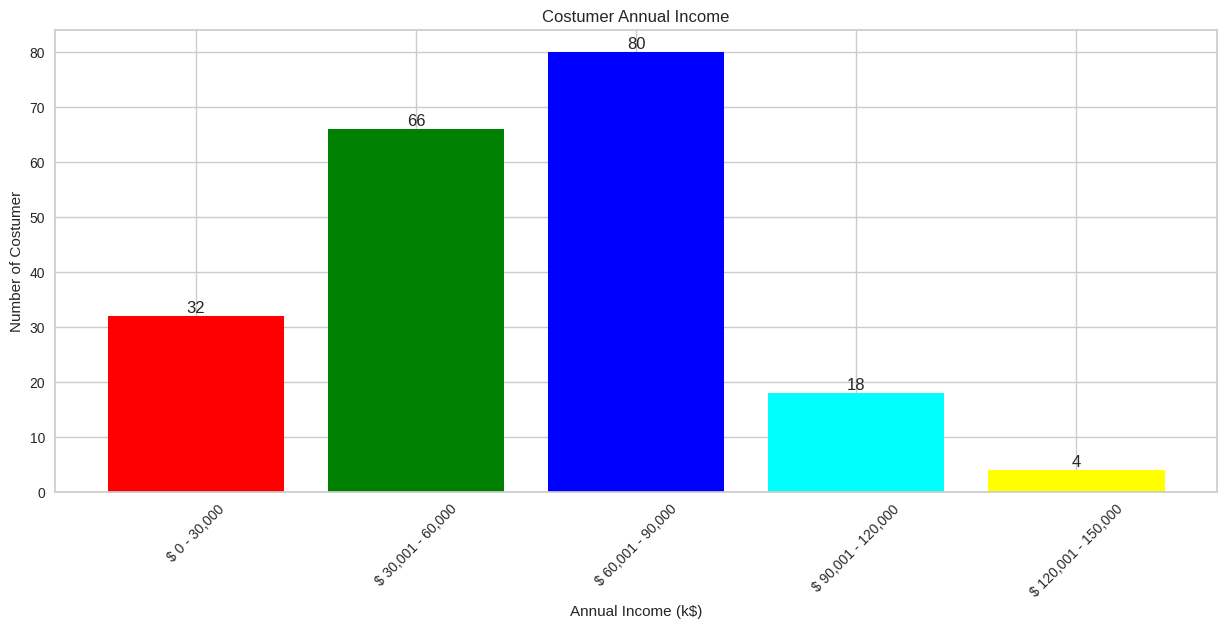

In [20]:
# Distribusi Pendapatan Tahunan Pelanggan
ai0_30 = mall_df['Annual Income (k$)'][(mall_df['Annual Income (k$)'] >= 0) &
                                       (mall_df['Annual Income (k$)'] <= 30)]
ai31_60 = mall_df['Annual Income (k$)'][(mall_df['Annual Income (k$)'] >= 31) &
                                       (mall_df['Annual Income (k$)'] <= 60)]
ai61_90 = mall_df['Annual Income (k$)'][(mall_df['Annual Income (k$)'] >= 61) &
                                       (mall_df['Annual Income (k$)'] <= 90)]
ai91_120 = mall_df['Annual Income (k$)'][(mall_df['Annual Income (k$)'] >= 91) &
                                       (mall_df['Annual Income (k$)'] <= 120)]
ai121_150 = mall_df['Annual Income (k$)'][(mall_df['Annual Income (k$)'] >= 121) &
                                       (mall_df['Annual Income (k$)'] <= 150)]

# Menyusun data untuk plotting
aix = ["$ 0 - 30,000", "$ 30,001 - 60,000", "$ 60,001 - 90,000", "$ 90,001 - 120,000", "$ 120,001 - 150,000"]
aiy = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]

# Membuat visualisasi bar chart untuk melihat hasil pendaptan costumer
plt.figure(figsize=(15,6))
plt.bar(aix, aiy, color=['red', 'green', 'blue', 'cyan', 'yellow'])
plt.title('Costumer Annual Income')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Number of Costumer')
plt.xticks(rotation=45) # Memutar label sumbu x agar lebih mudah dibaca

# Menambahkan label jumlah pelanggan diatas bar \
for i in range(len(aix)):
  plt.text(i, aiy[i], aiy[i], ha='center', va='bottom')

plt.show()

Informasi Visualisasi Pendapatan Costumer:
- 0–30,000: ada 32 pelanggan dalam rentang pendapatan ini.
- 30,001–60,000: kategori ini memiliki jumlah pelanggan terbanyak, yaitu 66.
- 60,001–90,000: ada 80 pelanggan dalam rentang pendapatan ini dan
 menjadikannya kategori dengan jumlah pelanggan terbesar.
- 90,001–120,000: rentang ini memiliki 18 pelanggan.
- 120,001–150,000: kategori ini mencakup 4 pelanggan yang merupakan jumlah paling sedikit di antara semua kategori.

# **Data Splitting**

In [22]:
# Mengambil data Annual Income (k$) dan Spending Score (1-100)
X = mall_df.iloc[:, [3,4]].values

# Menampilkan dataframe xX
print(pd.DataFrame(X, columns=['Annual Income (k$)', 'Spending Score (1-100)']))

     Annual Income (k$)  Spending Score (1-100)
0                    15                      39
1                    15                      81
2                    16                       6
3                    16                      77
4                    17                      40
..                  ...                     ...
195                 120                      79
196                 126                      28
197                 126                      74
198                 137                      18
199                 137                      83

[200 rows x 2 columns]


# **Modelling**

## Elbow Method

Tujuannya untuk menentukan jumlah cluster yang optimal untuk data kita.*teks yang dimiringkan*

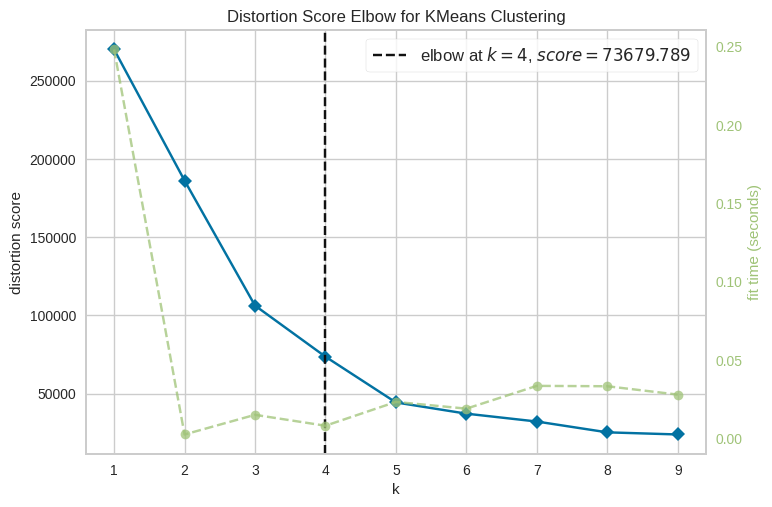

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [23]:
# Inisiasi Model K-Means tanpa paremeter awal
kmeans = KMeans()

# Inisialisasi Visualize ELbow Methon utk KMeans
visualizer = KElbowVisualizer(kmeans, k=(1,10))

# Melakukan fit visualizer dengan data
visualizer.fit(X)

# Menampilkan grafik elbow
visualizer.show()


Hasil:

Hasil analisis metode elbow menunjukkan bahwa jumlah cluster optimal adalah 4 dengan nilai total within-cluster sum of squares (WCSS) sebesar 73,679.789. Ini berarti bahwa membagi data menjadi 4 cluster memberikan keseimbangan terbaik antara meminimalkan jarak di dalam cluster dan memaksimalkan jarak antar cluster.


## Cluster Modeling (K-Means Clustering)

In [24]:
# Inisialisasi Model KMeans dengan jumlah cluset=4
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X)

# Mendapatkan laber cluster
labels = kmeans.labels_

# Mendapatkan jumlah cluster
k = 4

# Membuat fungsi untuk analisis cluster
def analyze_clusters(X, labels, k):
  print("Analisis Setiap CLuster:")
  for cluster_id in range(k):
    # Mengambil data untuk cluter saat ini
    cluster_data = X[labels == cluster_id]

    # Menghitung rata-rata untuk setiap fitur dalam cluster
    mean_income = cluster_data[:, 0].mean() # rata-rata annual income
    mean_spending = cluster_data[:, 1].mean() # rata-rata spending score

    print(f'Cluster {cluster_id + 1}:')
    print(f'Rata-rata Annual Income (k$): {mean_income:.2f}')
    print(f'Rata-rata Spending Score (1-100): {mean_spending:.2f}')

# Analisis Karakteristik Setiap cluster
analyze_clusters(X, labels, k)


Analisis Setiap CLuster:
Cluster 1:
Rata-rata Annual Income (k$): 48.26
Rata-rata Spending Score (1-100): 56.48
Cluster 2:
Rata-rata Annual Income (k$): 86.54
Rata-rata Spending Score (1-100): 82.13
Cluster 3:
Rata-rata Annual Income (k$): 87.00
Rata-rata Spending Score (1-100): 18.63
Cluster 4:
Rata-rata Annual Income (k$): 26.30
Rata-rata Spending Score (1-100): 20.91


## **Visualisasi Cluster**

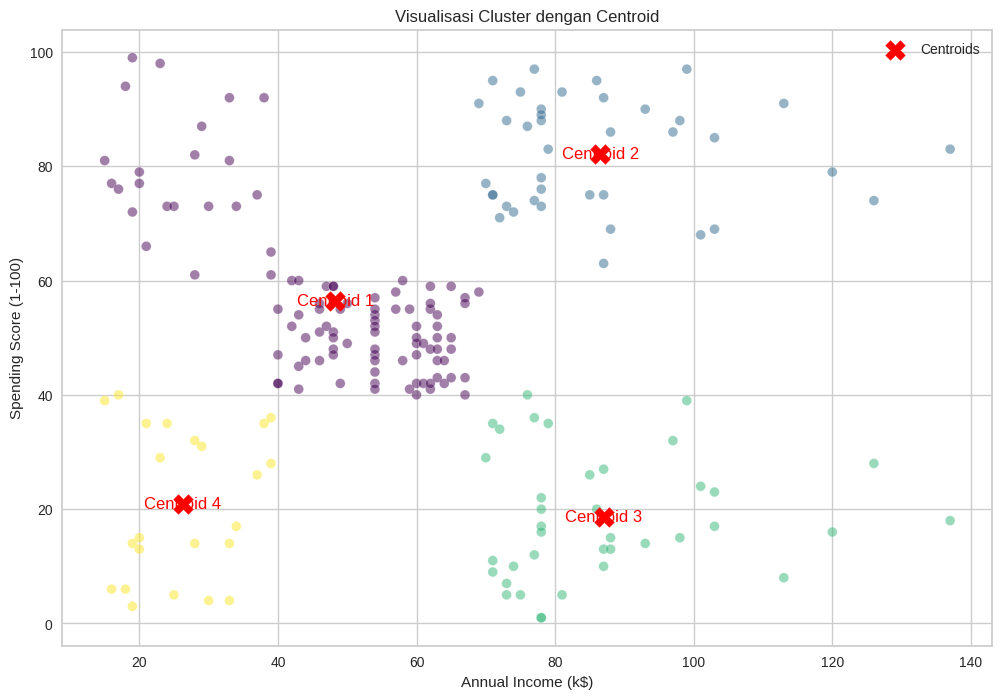

Nilai Centroid:
Centroid 1: Annual Income = 48.26, Spending Score = 56.48
Centroid 2: Annual Income = 86.54, Spending Score = 82.13
Centroid 3: Annual Income = 87.00, Spending Score = 18.63
Centroid 4: Annual Income = 26.30, Spending Score = 20.91


In [26]:
# Menentukan posisi centroid
centroids = kmeans.cluster_centers_

# Visualisasi Cluster
plt.figure(figsize=(12,8))

# plot data
plt.scatter(X[:,0], X[:,1], c=labels, cmap='viridis', s=50, alpha=0.5, edgecolors='w', marker='o')

# plot centroid
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=200, marker='X', label='Centroids')

# menambah label centroid pada plot
for i, centroid in enumerate(centroids):
  plt.text(centroid[0], centroid[1], f'Centroid {i+1}', color='red', fontsize=12, ha='center', va='center')

# Menambah judul dan label
plt.title('Visualisasi Cluster dengan Centroid')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()

plt.show()

# menampilkan nilai centroid
print('Nilai Centroid:')
for i, centroid in enumerate(centroids):
    print(f"Centroid {i+1}: Annual Income = {centroid[0]:.2f}, Spending Score = {centroid[1]:.2f}")

Nilai centroid untuk setiap cluster sebagai berikut.

- Centroid 1: pendapatan tahunan 48,260 serta skor belanja 56.48 menunjukkan pelanggan dengan pendapatan menengah dan belanja tinggi.
- Centroid 2: pendapatan tahunan 86,540 serta skor belanja 82.13 menggambarkan pelanggan dengan pendapatan tinggi dan belanja intensif.
- Centroid 3: pendapatan tahunan 87,000 serta skor belanja 18.63 menunjukkan pelanggan berpendapatan tinggi dan berbelanja sedikit.
- Centroid 4: pendapatan tahunan 26,300 serta skor belanja 20.91 menunjukkan pelanggan dengan pendapatan dan belanja rendah.